In [86]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("albatross_foil-camber_line.csv")

# Display the first 5 rows
display(df.head())

# Convert DataFrame to dictionary
foil_dict = dict(zip(df["X(mm)"], df["Y(mm)"]))
display(foil_dict)

x_foil = df["X(mm)"].tolist()
y_foil = df["Y(mm)"].tolist()

,X(mm),Y(mm)
0,0.000,0.000000
1,1.241,0.978000
2,2.486,1.335821
3,4.978,2.261891
4,7.473,3.007482


{0.0: 0.0,
 1.241: 0.978,
 2.486: 1.335821,
 4.978: 2.261891,
 7.473: 3.007482,
 9.968: 3.629307,
 14.962: 4.642119,
 19.958: 5.270297,
 29.956: 5.816957,
 39.956: 5.908512,
 49.96: 5.539977,
 59.965: 4.806317,
 69.972: 3.832384,
 79.98: 2.728385,
 89.989: 1.524238,
 94.994: 0.842138,
 100.0: 0.0}

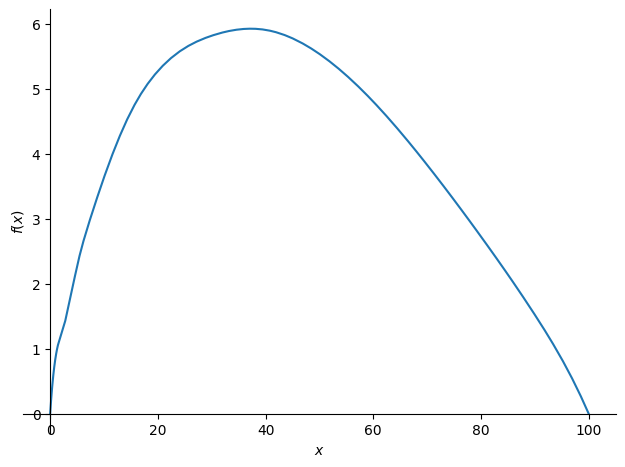

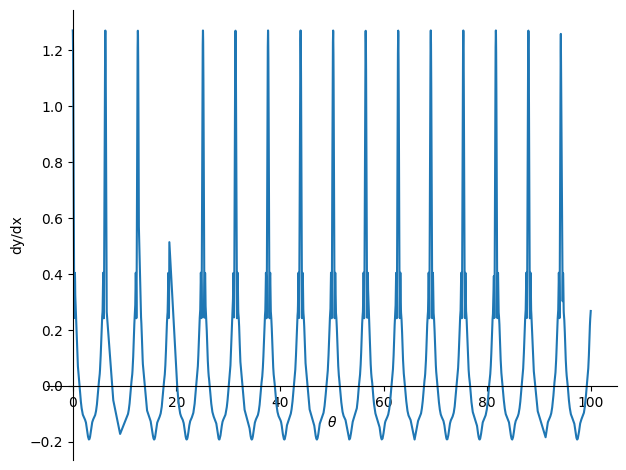

In [100]:
import sympy as sp

alpha, theta, x = sp.symbols("alpha, theta, x")
chord_length = 100

# Construct an interpolating polynomial for x_foil and y_foil
y_func_x = sp.interpolating_spline(3, x, x_foil, y_foil)

# Plot y_func_x
sp.plot(y_func_x, (x, 0, chord_length))

# Differentiate y_func_x with respect to x
dydx_func_x = y_func_x.diff(x)

# Variable substitution from x to theta
dydx_func_theta = dydx_func_x.subs(x, chord_length / 2 * (1 - sp.cos(theta)))

# Plot dydx_func_theta
sp.plot(dydx_func_theta, (theta, 0, chord_length), ylabel="dy/dx")

# Calculate the lift coefficient
C_l = (
    2
    * sp.pi
    * (
        alpha
        + (1 / sp.pi)
        * sp.integrate(dydx_func_theta * (sp.cos(theta) - 1), (theta, 0, sp.pi))
    )
)

# Display the equation
display(C_l)